# Energy Usage Prediction of Steel Industry


# I. Introduction

The dataset we have chosen for this Machine Learning project is called "Steel Industry Energy Consumption". This dataset was sourced through the repository of University of California, Irvine, which contains information depicting electricity consumption held in a cloud-based system from DAEWOO Steel Co. Ltd in Gwangyang, South Korea. This data was collected through a now-defunct South Korean government website (https://pcss.kepco.go.kr) ,a government website containing the energy consumption of companies throughout South Korea as part of a Corporate Social Responsibility program. According to the UCI repository, this data has nine features and/or columns, but our findings are that the dataset has eleven in actuality. It might be the case that the nine mentioned are:

- **date:** The date and time of the data entry.
- **Usage_kWh:** The amount of electricity used in kilowatt-hours.
- **Lagging_Current_Reactive.Power_kVarh:** The lagging current reactive power in kilovolt-ampere reactive hours.
- **Leading_Current_Reactive_Power_kVarh:** The leading current reactive power in kilovolt-ampere reactive hours.
- **CO2(tCO2):** The amount of CO2 emissions in metric tons.
- **Lagging_Current_Power_Factor:** The lagging current power factor.
- **Leading_Current_Power_Factor:** The leading current power factor.
- **NSM:** Number of Seconds before Midnight. We are not sure as to what this actually means.

- **Load_Type:** The type of load (Light Load, Medium Load, or Heavy Load).

and that they consider the two following features as derivations of the date feature.

- **WeekStatus:** Indicates whether the data entry is from a weekday or weekend.
- **Day_of_week:** The day of the week.

This dataset has 35040 Rows, all of which have non-null or duplicate values, which we will confirm later on.

The objective of this project is to predict this company's energy usage, which could be used strategically to improve operations within the company. Here are some use cases we could come up with:

1. **Cost Optimization**: Since energy costs are a significant part of operational expenses in such industries, predicting energy usage can aid in detecting peak consumption periods and improving operations to save money.

2. **Sustainability**: With a growing emphasis on sustainability, anticipating energy use can help reduce the carbon footprint. Accurate forecasting allows businesses to alter production plans and procedures to enhance energy efficiency.

3. **Regulatory Compliance**: Governments around the world are enforcing stronger limits on energy consumption and emissions. Predictive analytics can help organizations comply with these rules by allowing them to control their energy use more effectively.

Essentially, if we were to apply our findings and our optimal model in real life, we could help this company to manage their energy resources more effectively in a way that minimizes their costs and maximizes their profits, and to be a more sustainable and eco-friendly company.

Before we delve into the project itself, We would first like to specify that we are building **regression models**, since we are predicting a continuous variable, namely the **"Usage_kWh"** variable.


### Install the UCI Machine Learning Repository using the following code:


In [1]:
!pip3 install ucimlrepo

### Importing the necessary libraries (NumPy, math, pandas, seaborn, matplotlib, parts of scikit-learn, parts of SciPy, joblib)


In [2]:
# import library
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import (
    ElasticNetCV,
    LinearRegression,
)

from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    VotingRegressor,
)

from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.stats import randint, uniform
from joblib import dump, load

# II. Data Extraction


### In this following code block, we are fetching the designated dataset, with the id 851 to get the Steel Industry Energy Consumption dataset.**bold text**


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)

df = steel_industry_energy_consumption.data.original

### Number of Rows and Columns (35040 Rows and 11 Columns)


In [4]:
df.shape

(35040, 11)

### First five rows of the dataframe


In [5]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### List of columns name


In [6]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

### Renaming attributes as necessary, for the sake of consistency and coherence.


In [7]:
# rename attribute
df = df.rename(
    columns={
        "Lagging_Current_Reactive.Power_kVarh": "Lagging_Current_Reactive_Power_kVarh",
        "CO2(tCO2)": "CO2",
    }
)

### Extract the date for further insight (Into date, month, day_of_month and hour)


In [8]:
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y %H:%M")
df["month"] = df["date"].dt.month
df["day_of_month"] = df["date"].dt.day
df["hour"] = df["date"].dt.hour

# III. Exploratory Data Analysis (EDA)


### Brief description of the dataframe


In [9]:
df.describe()

,date,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,month,day_of_month,hour
count,35040,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,2018-07-02 11:52:30,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000,6.526027,15.720548,11.500000
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2018-04-02 05:56:15,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000,4.000000,8.000000,5.750000
50%,2018-07-02 11:52:30,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000,7.000000,16.000000,11.500000
75%,2018-10-01 17:48:45,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000,10.000000,23.000000,17.250000
max,2018-12-31 23:45:00,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000,12.000000,31.000000,23.000000
std,NaN,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317,3.447901,8.796373,6.922285


### Information on the dataframe: All values throughout columns are non-null values, with :

- 1 variable being of the datetime64 type
- 6 being float64, three being int32
- 1 being int64
- 3 being object or categorical variables.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2                                   35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

### Classify categorical and numeric columns


In [75]:
numerical_cols = df.select_dtypes(
    include=["int32", "float64", "int64"]
).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:")
for col in numerical_cols:
    print(col)

# Printing categorical columns vertically
print("\nCategorical columns:")
for col in categorical_cols:
    print(col)

Numerical columns:
Usage_kWh
Lagging_Current_Reactive_Power_kVarh
Leading_Current_Reactive_Power_kVarh
CO2
Lagging_Current_Power_Factor
Leading_Current_Power_Factor
NSM
month
day_of_month
hour
Cluster

Categorical columns:
WeekStatus
Load_Type


### Check value distribution in categorical column


In [12]:
for column in categorical_cols:
    print(df[column].value_counts())
    print("\n")

WeekStatus
Weekday    25056
Weekend     9984
Name: count, dtype: int64


Day_of_week
Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: count, dtype: int64


Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64




# Checking Null, Duplicate


In [13]:
print("Check null: ", df.isnull().sum())
print("\n")
print("Check duplicate: ", df.duplicated().sum())

Check null:  date                                    0
Usage_kWh                               0
Lagging_Current_Reactive_Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
month                                   0
day_of_month                            0
hour                                    0
dtype: int64


Check duplicate:  0


# Energy Consumption Overtime


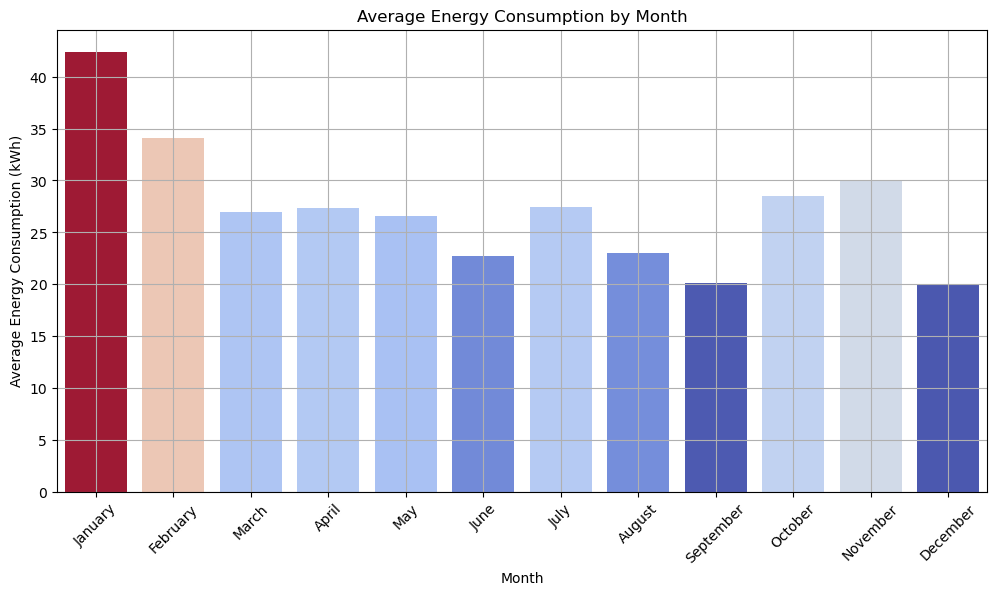

In [14]:
df["month"] = df["date"].dt.month_name()

# Calculate the average energy consumption for each month
monthly_energy = df.groupby("month")["Usage_kWh"].mean()

# Sort the months in calendar order
months_in_order = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
monthly_energy = monthly_energy.reindex(months_in_order)

# Normalize the energy values to get a range from 0 to 1 for the color intensity
normalized_energy = (monthly_energy - monthly_energy.min()) / (
    monthly_energy.max() - monthly_energy.min()
)

# Create a palette that varies from light to dark based on energy consumption
palette = sns.color_palette("coolwarm", as_cmap=True)
colors = palette(normalized_energy.values)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_energy.index, y=monthly_energy.values, palette=colors)
plt.title("Average Energy Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption (kWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df["month"] = df["date"].dt.month

### Here, we see that most companies will use energy more during the first half of the year rather than the second.

### This is because companies have a set of environment restrictions by the government in Korea, they tend to limit their use in the latter half to not exceed the restrictions given to them.


# Pair Plot


/Users/louistran/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


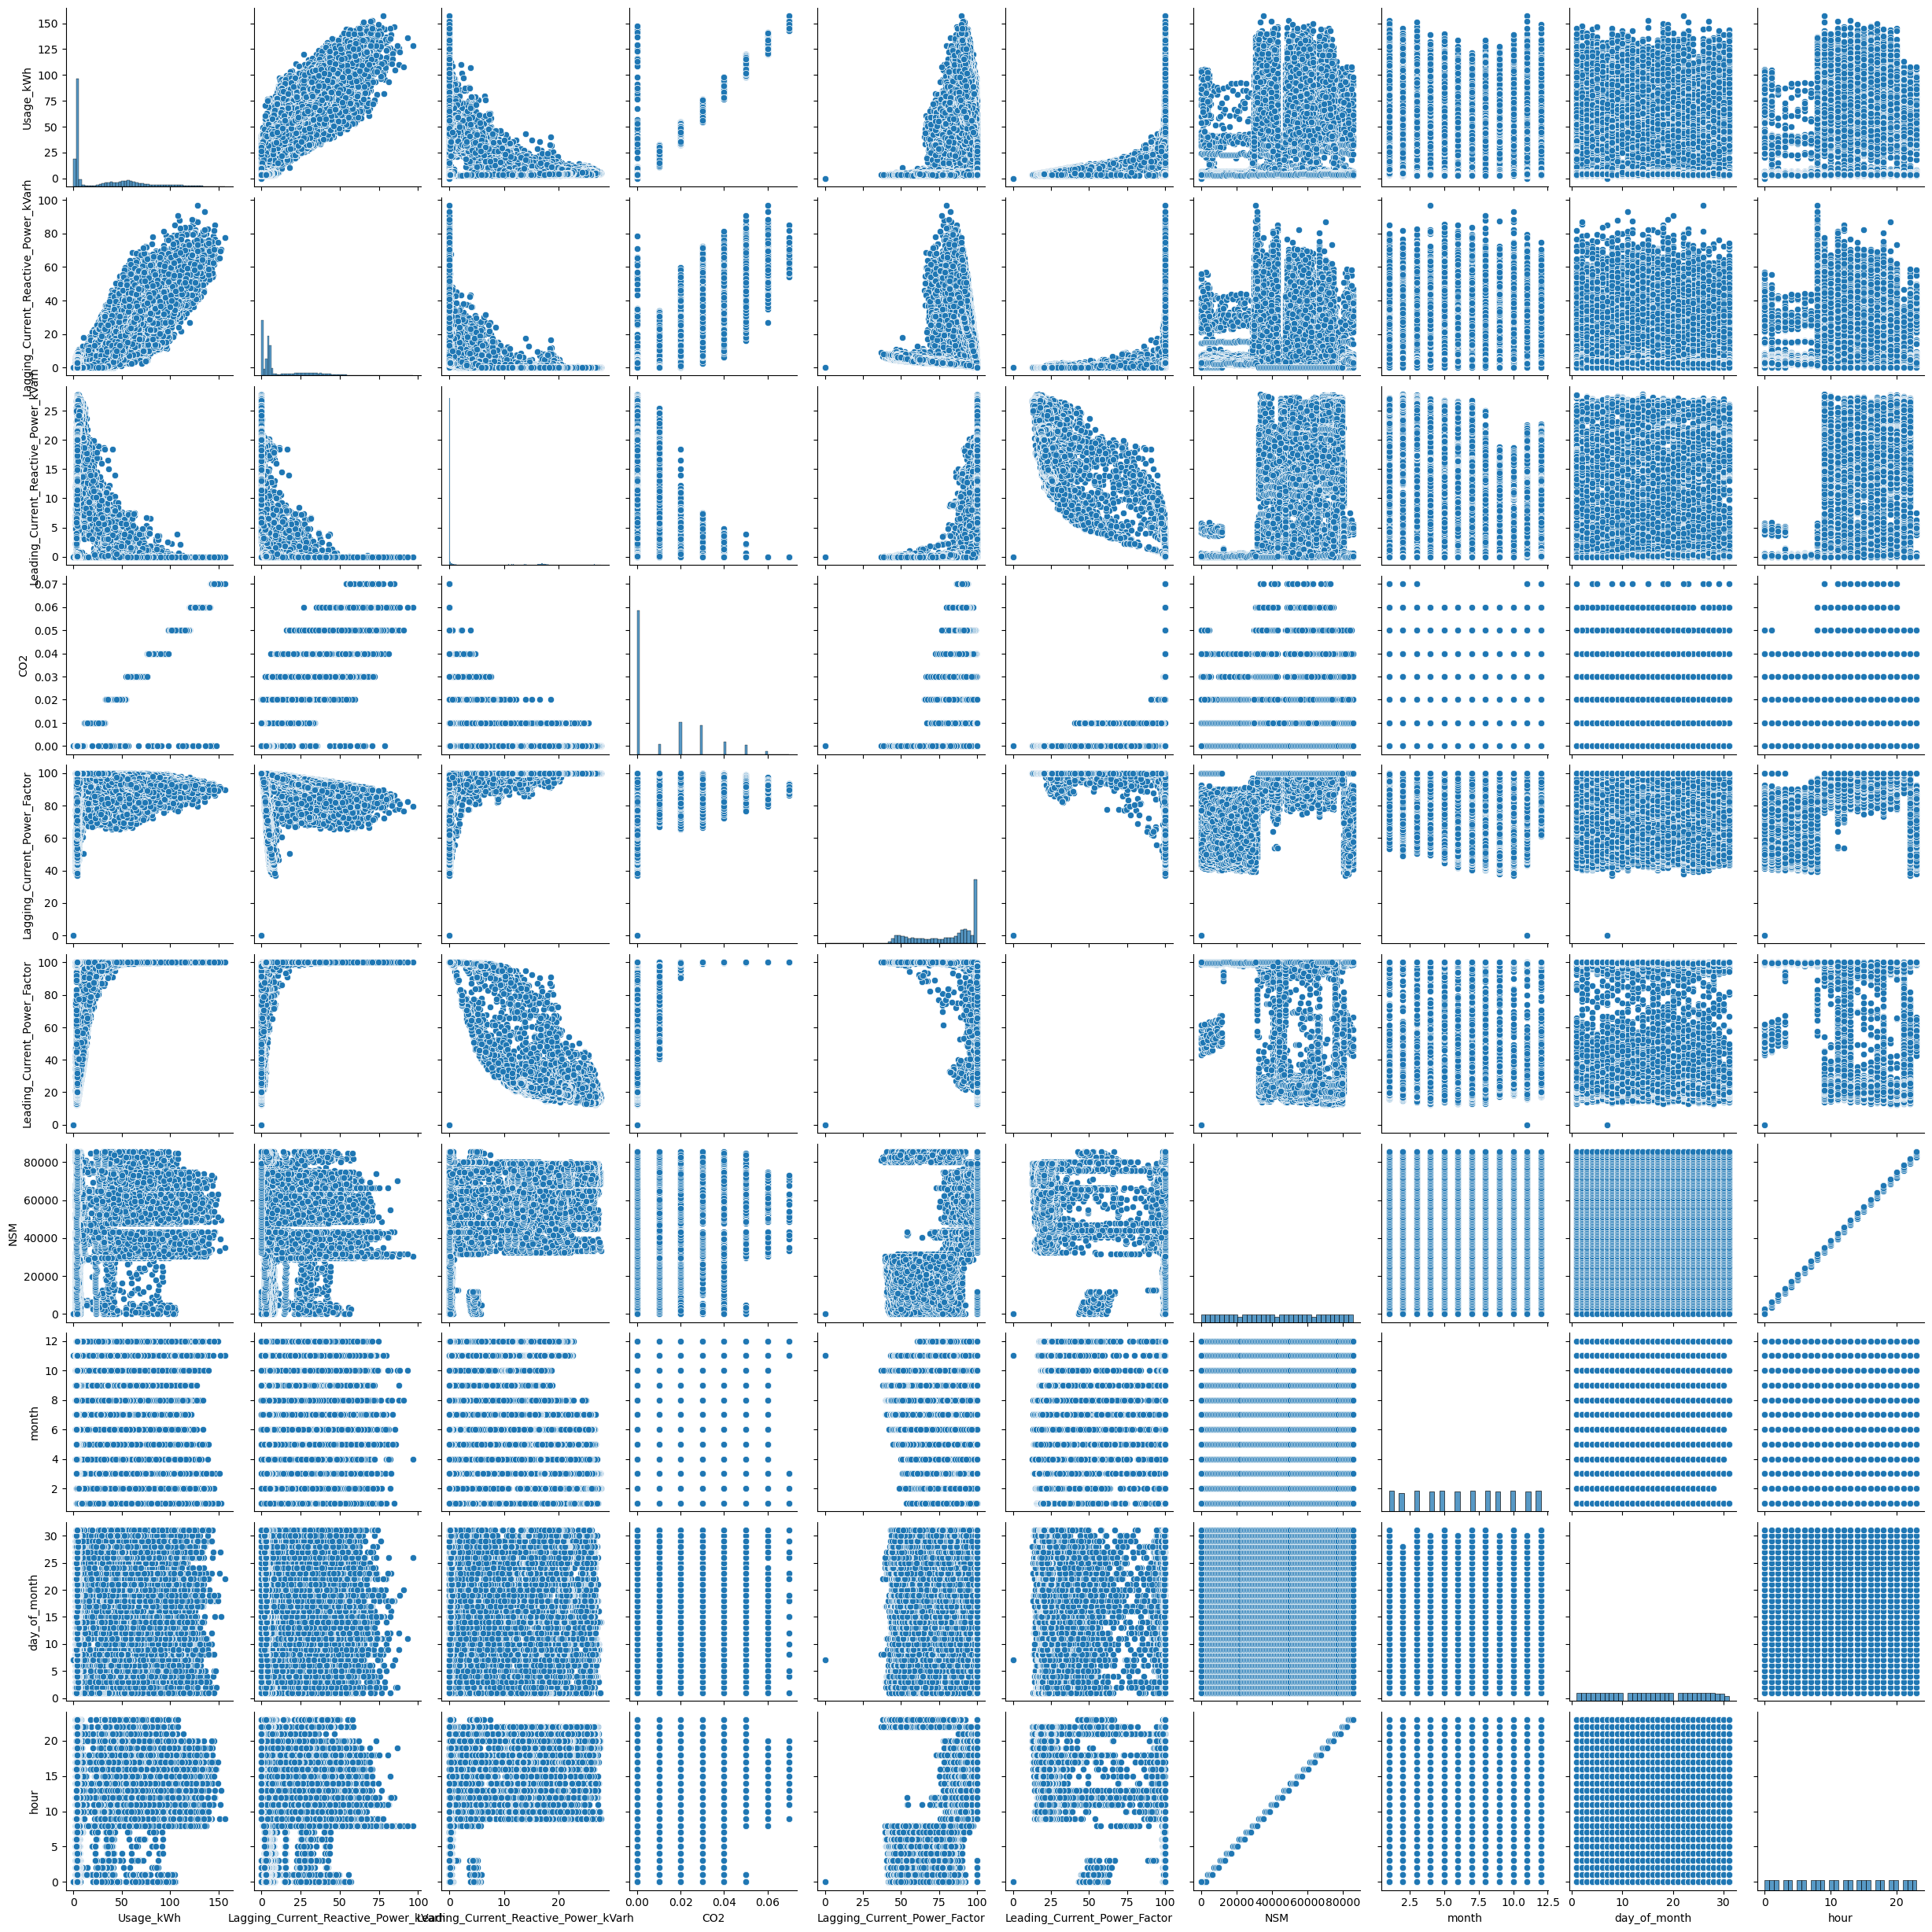

In [15]:
sns.pairplot(df)

# Plot for numerical columns

- ## Box Plot


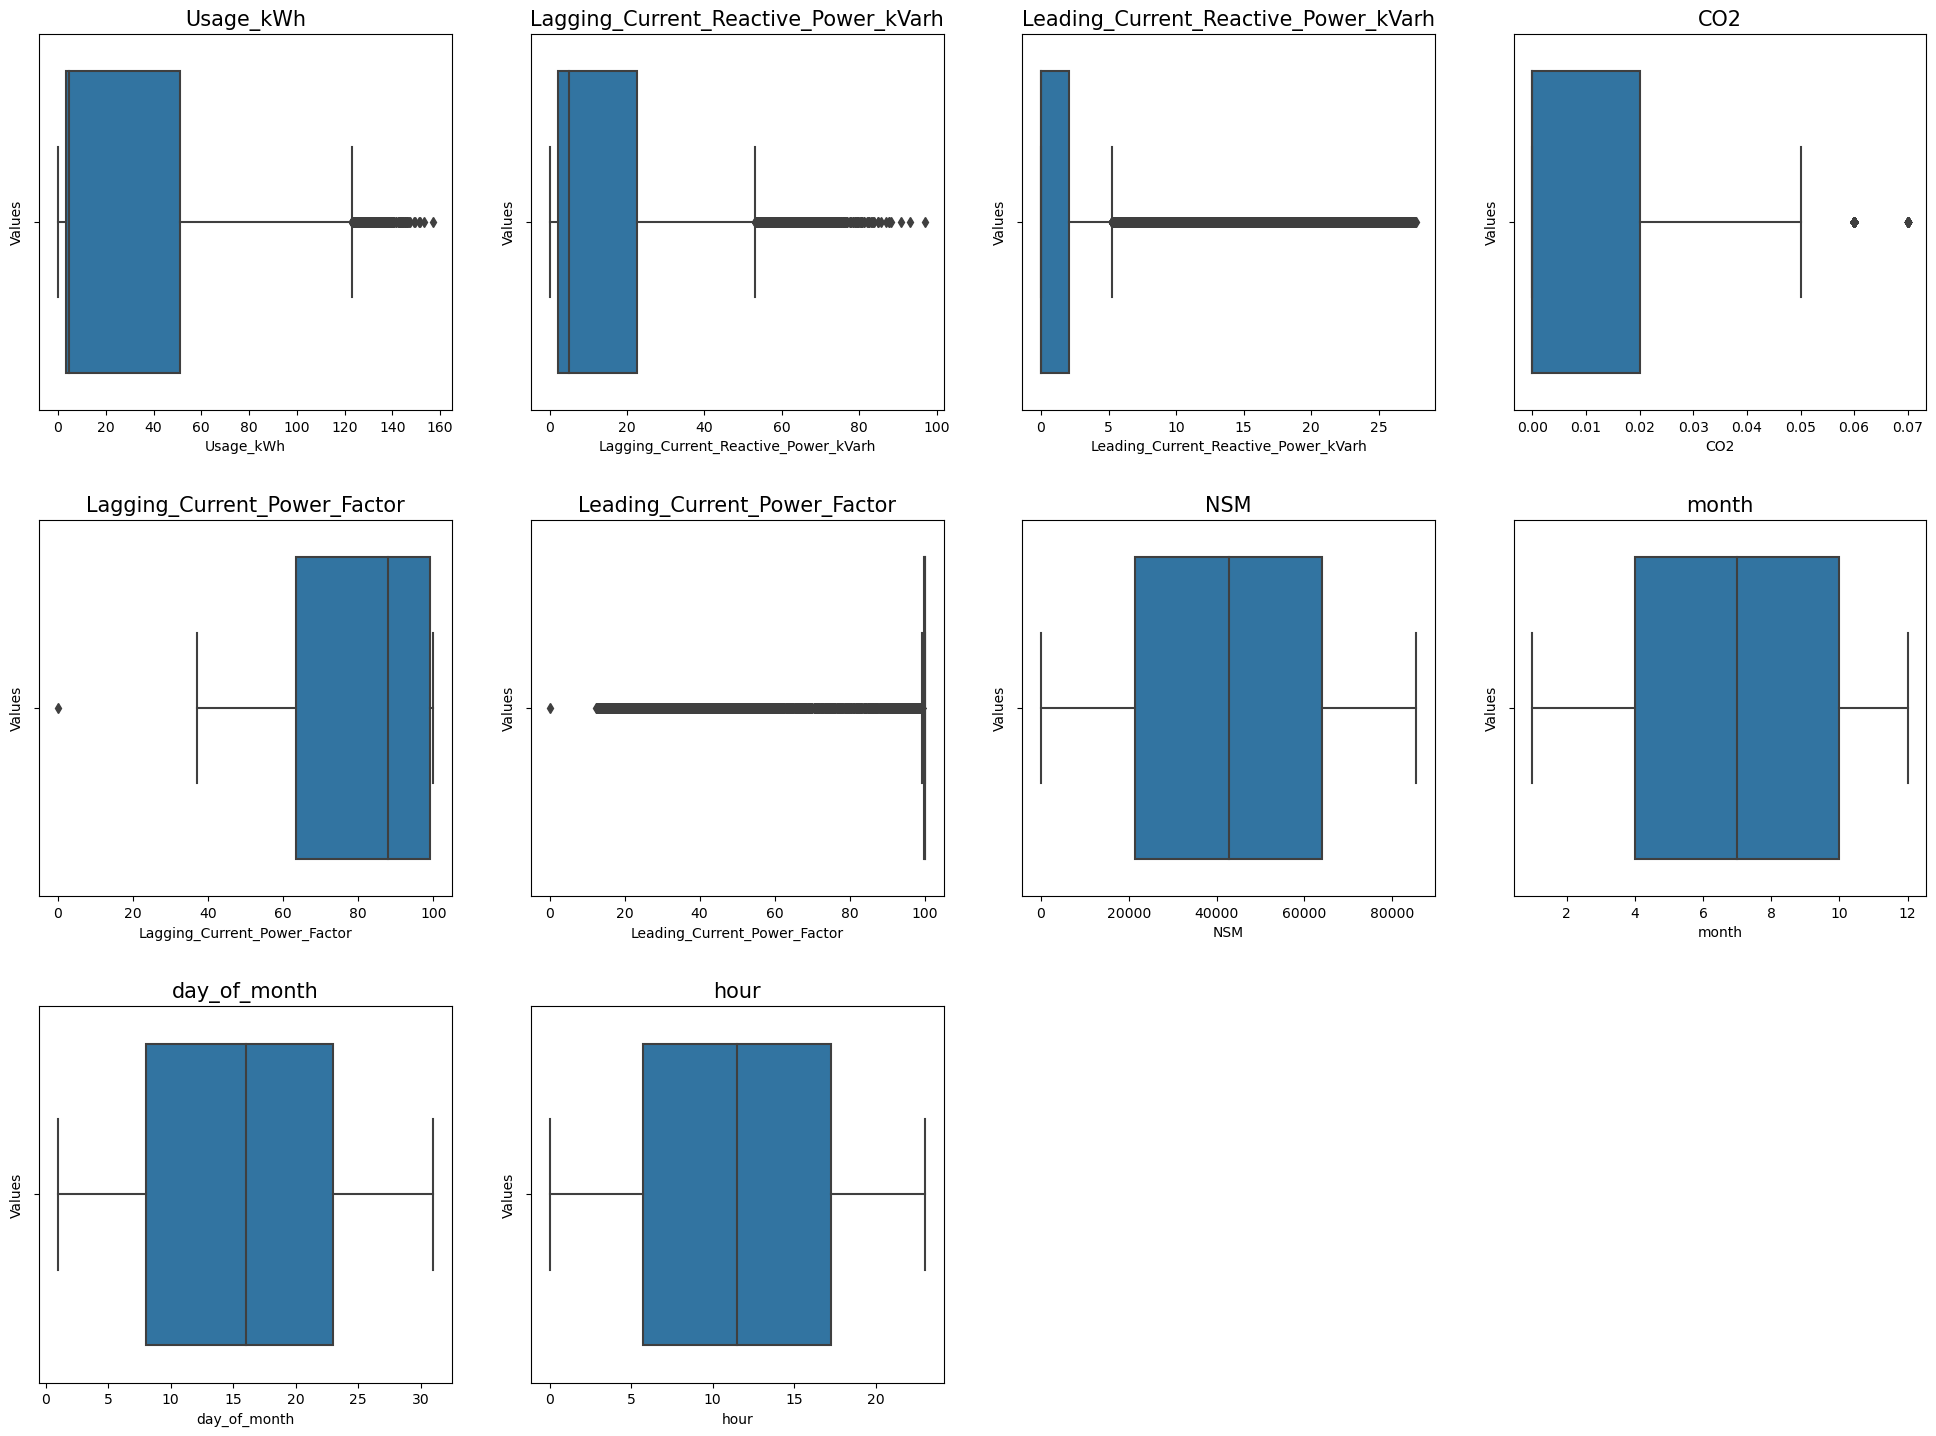

In [16]:
# Determine the layout of the subplots
num_cols = len(numerical_cols)
n_rows = int(np.sqrt(num_cols))  # Number of rows in the grid
n_cols = (num_cols // n_rows) + (num_cols % n_rows > 0)  # Number of columns in the grid

# Setting up the plotting area
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Creating a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])  # Seaborn's boxplot
    axes[i].set_title(f"{col}", fontsize=15)
    axes[i].set_xlabel(f"{col}")
    axes[i].set_ylabel("Values")

# Hide unused subplots if there are any
for ax in axes[num_cols:]:
    ax.set_visible(False)

# Adding a bit more spacing between plots
plt.tight_layout(pad=3.0)
plt.show()

### Remove the outliers


In [17]:
for col in numerical_cols:
    q95 = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=q95)

- # Histogram


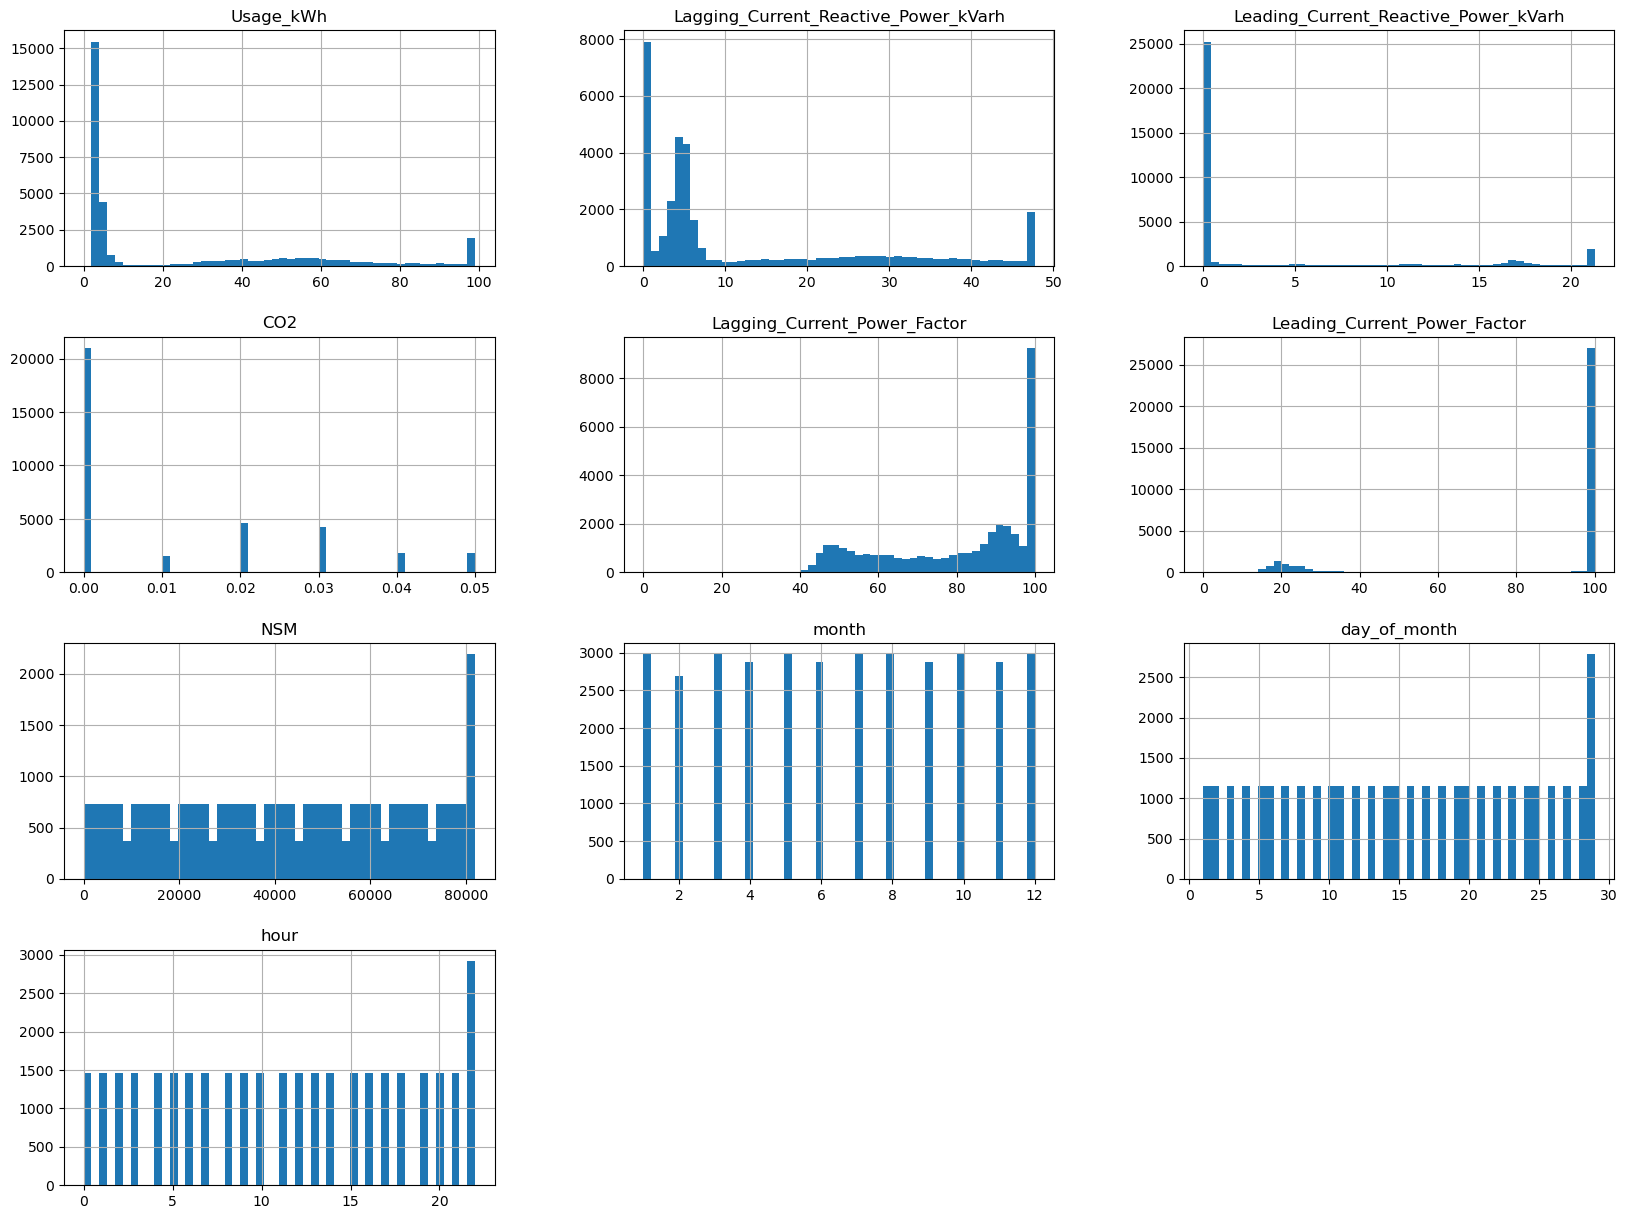

In [18]:
df.drop(["date"], axis=1).hist(bins=50, figsize=(20, 15))
plt.show()

# Plot for categorical columns


- # Count plot


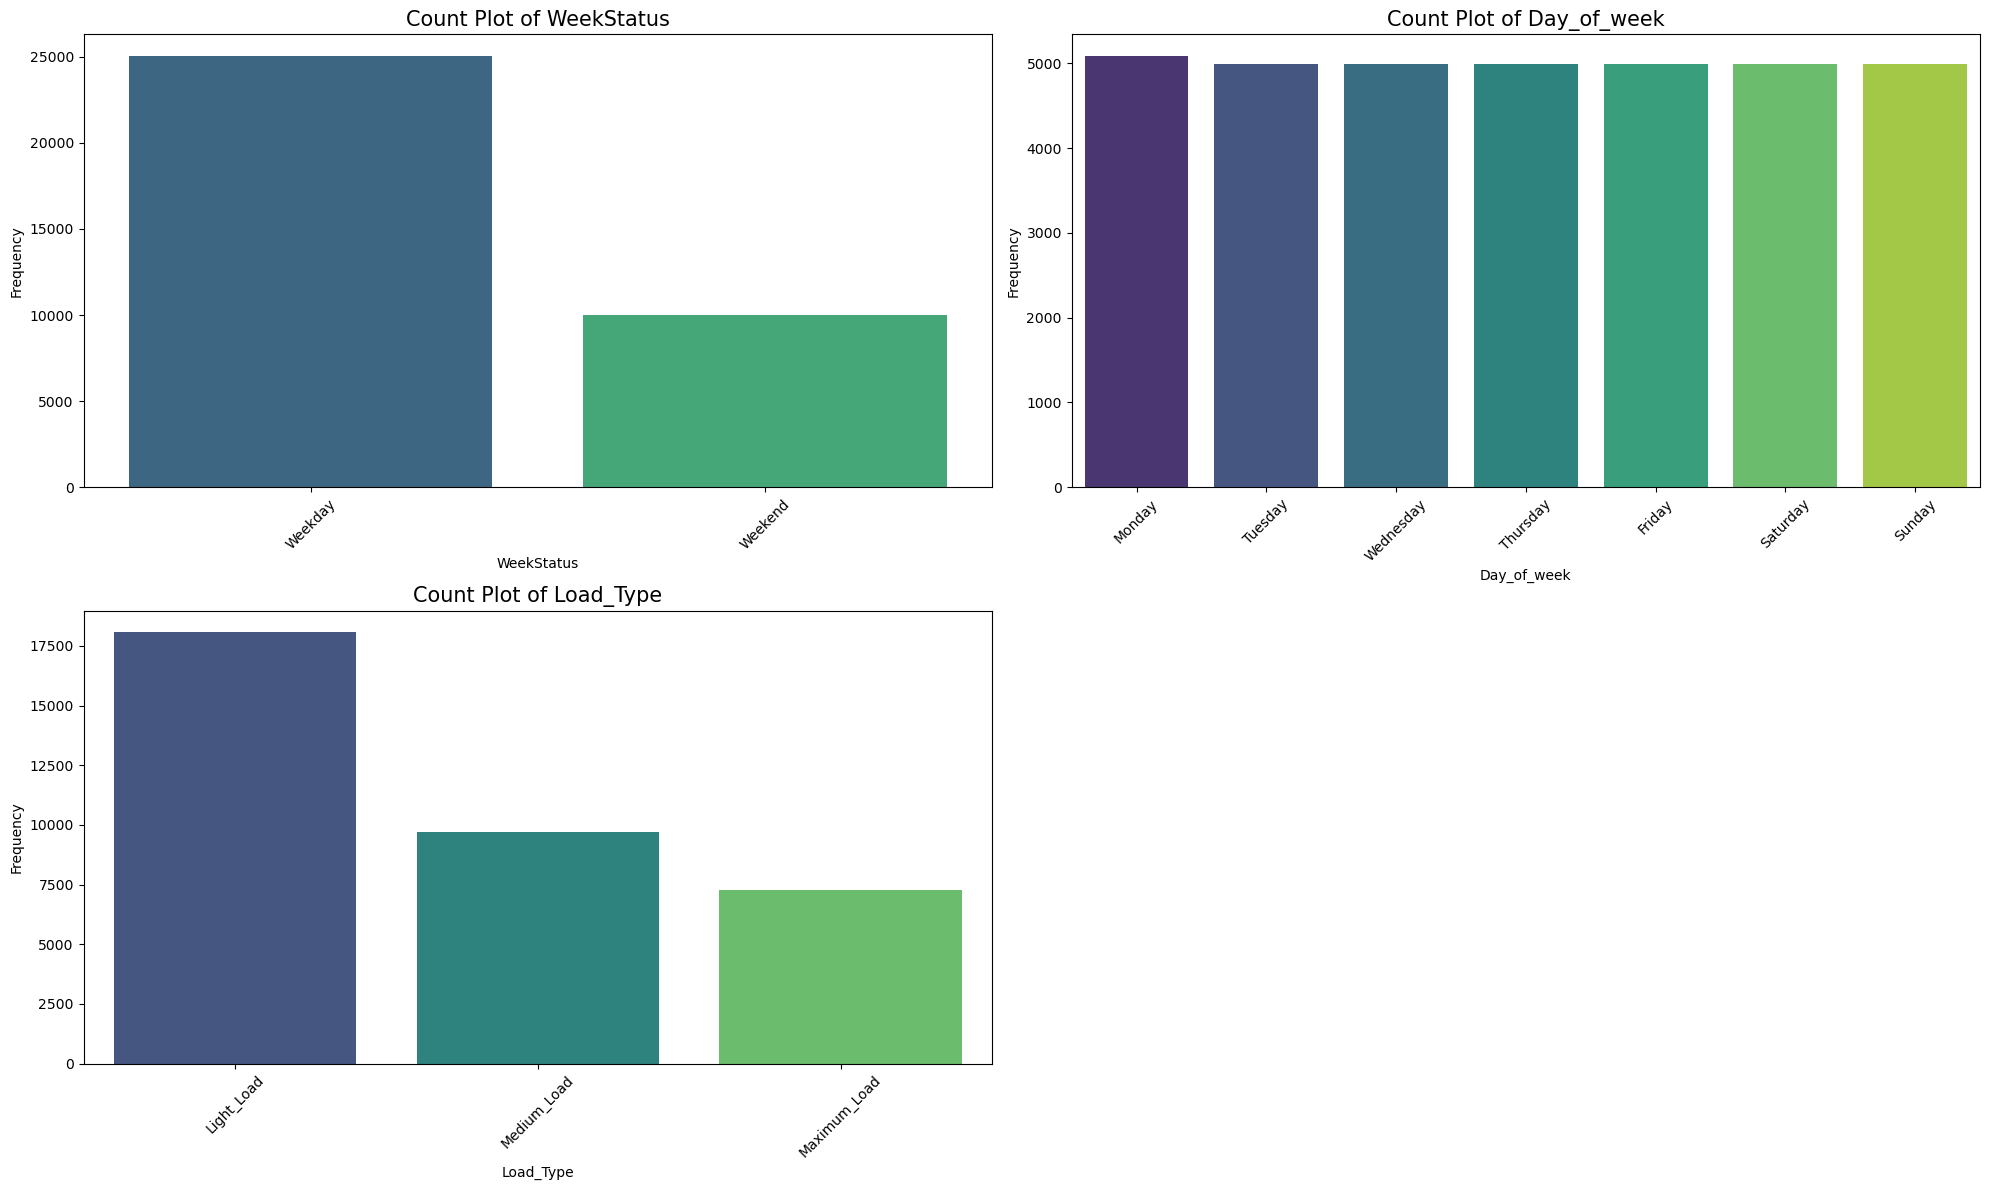

In [19]:
# Number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10 * n_cols, 6 * n_rows))

# Flatten the array of axes, so it's easier to iterate over them for plotting
axes = axes.flatten()

# Plotting a count plot for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Count Plot of {col}", fontsize=15)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis="x", rotation=45)  # Rotate labels for better readability

# Hide any unused axes if the number of plots is not a perfect multiple of n_cols * n_rows
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Some other complex plots


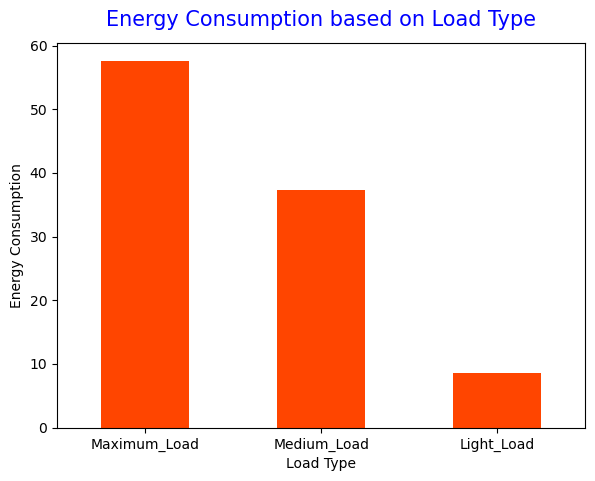

In [20]:
# visualize energy consumption based on load type
plt.rcParams["figure.figsize"] = (15, 5)
plt.subplot(1, 2, 1)
chart = (
    df.groupby("Load_Type")["Usage_kWh"]
    .mean()
    .sort_values(ascending=False)
    .plot(kind="bar", color="orangered")
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title("Energy Consumption based on Load Type", fontsize=15, color="b", pad=12)
plt.xlabel("Load Type")
plt.ylabel("Energy Consumption")
plt.show()

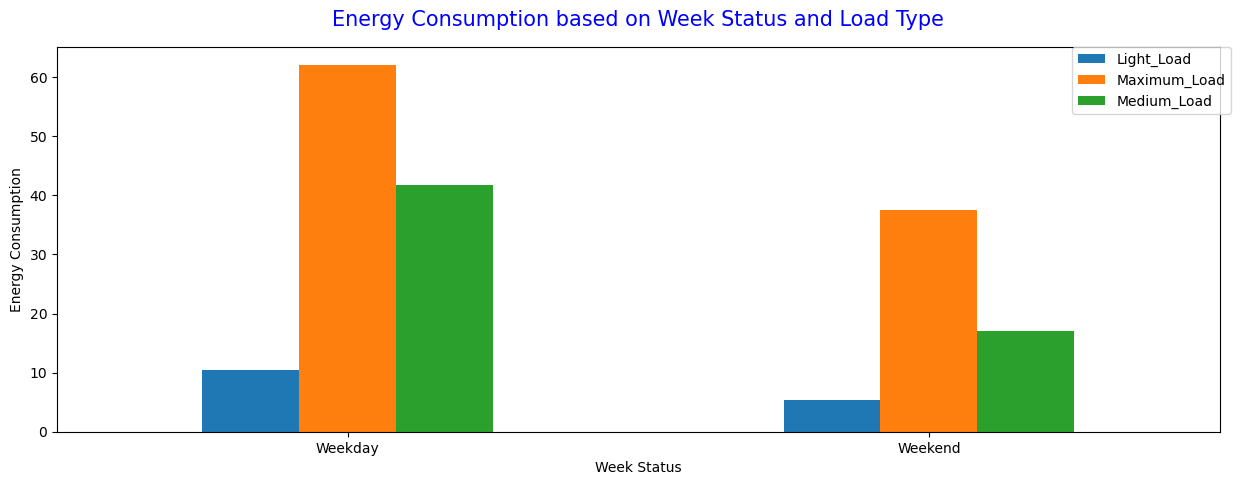

In [21]:
# visualize energy consumption based on week status and load type
plt.rcParams["figure.figsize"] = (15, 5)
chart = (
    df.groupby(["WeekStatus", "Load_Type"])["Usage_kWh"]
    .mean()
    .unstack()
    .plot(kind="bar")
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.title(
    "Energy Consumption based on Week Status and Load Type",
    fontsize=15,
    pad=15,
    color="b",
)
plt.xlabel("Week Status")
plt.ylabel("Energy Consumption")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

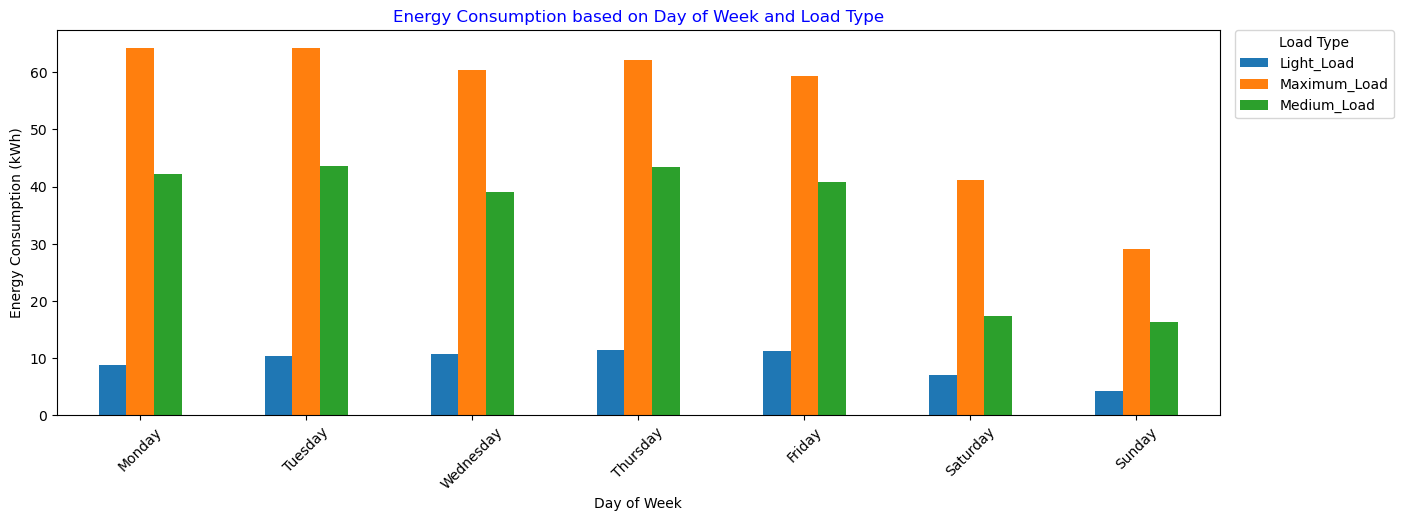

In [22]:
# Assuming df is your pandas DataFrame

plt.rcParams["figure.figsize"] = (15, 5)


day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
df["Day_of_week"] = pd.Categorical(
    df["Day_of_week"], categories=day_order, ordered=True
)

# First subplot
# plt.subplot(1, 2, 1)
chart = (
    df.groupby(["Day_of_week", "Load_Type"])["Usage_kWh"]
    .mean()
    .unstack()
    .plot(kind="bar")
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title(
    "Energy Consumption based on Day of Week and Load Type",
    color="blue",
)
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumption (kWh)")
plt.legend(title="Load Type", bbox_to_anchor=(1.15, 1), borderaxespad=0)
plt.show()

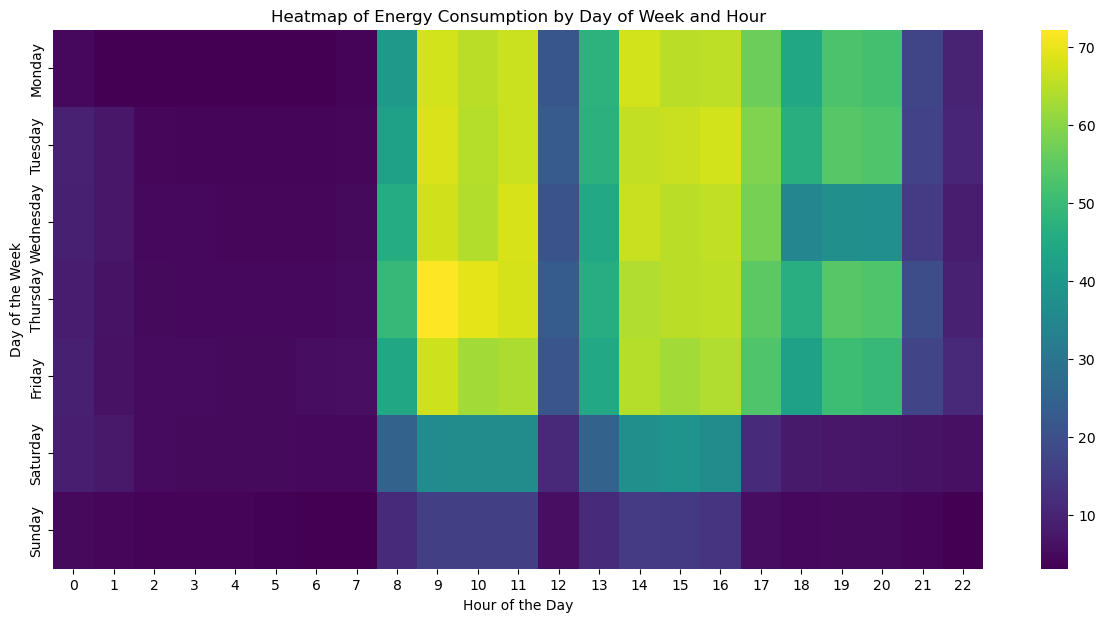

In [23]:
# Creating a pivot table for day of week and hour
pivot_table = df.pivot_table(
    values="Usage_kWh", index="Day_of_week", columns="hour", aggfunc="mean"
)

plt.figure(figsize=(15, 7))
sns.heatmap(pivot_table, cmap="viridis")
plt.title("Heatmap of Energy Consumption by Day of Week and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

- ### The heatmap indicates peak energy consumption occurs midday on weekdays, suggesting a pattern of high activity or environmental factors at play.
- ### Weekends show a more even distribution with later starts, possibly reflecting a change in routine.
- ### Early morning hours consistently show the lowest energy usage across all days.


# IV. Clustering


In [24]:
X = df.drop(["Usage_kWh", "date"], axis=1)

In [25]:
# Define numerical features that will be scaled
numerical_features = [
    "Lagging_Current_Reactive_Power_kVarh",
    "Leading_Current_Reactive_Power_kVarh",
    "Lagging_Current_Power_Factor",
    "Leading_Current_Power_Factor",
    "Lagging_Current_Reactive_Power_kVarh",
    "Leading_Current_Reactive_Power_kVarh",
    "Lagging_Current_Power_Factor",
    "Leading_Current_Power_Factor",
    "NSM",
    "month",
    "day_of_month",
    "hour",
    "CO2",
]

# Categorical features for encoding
categorical_features = [
    "Load_Type",
    "WeekStatus",
    "Day_of_week",
]

In [26]:
# Define transformers for the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

In [27]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

In [28]:
X_processed = pipeline.fit_transform(X)  # Transform the data using the pipeline

In [29]:
X_processed

array([[-0.63951701, -0.53169892, -0.38941049, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53920622, -0.53169892, -0.72977211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.61759479, -0.53169892, -0.54426446, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.6249022 , -0.52164697, -0.20918795, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63220961, -0.515903  , -0.15105165, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63486685, -0.52164697, -0.17747724, ...,  0.        ,
         0.        ,  0.        ]])

## Implement Elbow and Silhouette Plot


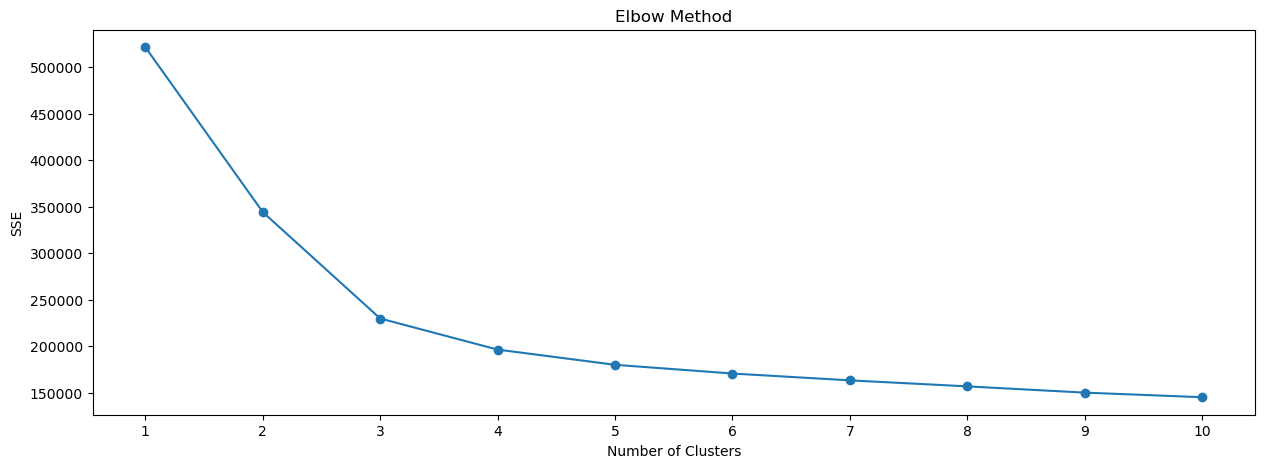

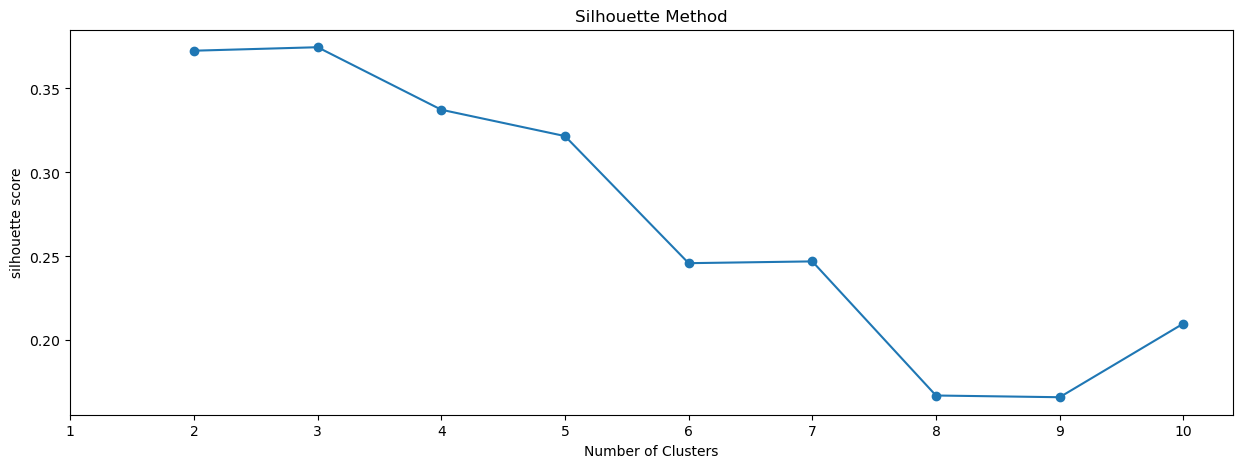

In [30]:
sse = []
sil = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0
    ).fit(X_processed)
    sse.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(X_processed, kmeans.labels_))


plt.figure()
plt.plot(range(1, 11), sse, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.xticks(range(1, 11))
plt.show()

plt.figure()
plt.plot(range(2, 11), sil, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.title("Silhouette Method")
plt.xticks(range(1, 11))

plt.show()

# We choose K = 3


In [78]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)

df["Cluster"] = clusters

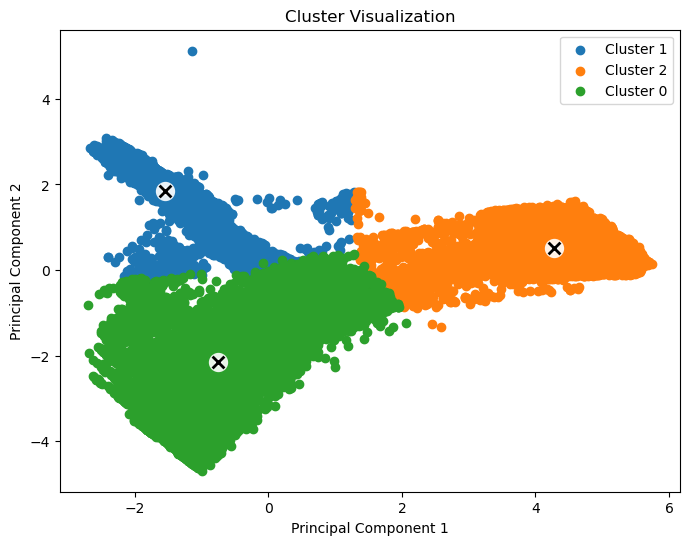

In [79]:
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization
df_pca = pca.fit_transform(X_processed)
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters


# Plotting
plt.figure(figsize=(8, 6))
for c in df_pca["Cluster"].unique():
    plt.scatter(
        df_pca[df_pca["Cluster"] == c]["PC1"],
        df_pca[df_pca["Cluster"] == c]["PC2"],
        label=f"Cluster {c}",
    )


def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="o",
        s=35,
        linewidths=8,
        color=circle_color,
        zorder=10,
        alpha=0.9,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=2,
        linewidths=12,
        color=cross_color,
        zorder=11,
        alpha=1,
    )


plot_centroids(pca.transform(kmeans.cluster_centers_))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cluster Visualization")
plt.legend()
plt.show()

In [33]:
X_processed_pca = pd.DataFrame(
    X_processed,
    columns=numerical_features
    + list(
        pipeline.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out()
    ),
)

pca_variance = PCA(n_components=0.95)

X_2D_variance = pca_variance.fit_transform(X_processed_pca)

print(X_2D_variance.shape)
print(pca_variance.explained_variance_ratio_)

# feature_contributions = np.abs(pca_variance.components_[0])
# feature_names = X_processed_pca.columns

# plt.figure(figsize=(10, 6))
# plt.bar(feature_names, feature_contributions, color="skyblue")
# plt.xlabel("Features")
# plt.ylabel("Loading Magnitude")
# plt.title("Contribution of Features to PC1")
# plt.xticks(rotation=90)  # Rotate feature names for readability
# plt.tight_layout()  # Adjust layout
# plt.show()

(35040, 10)
[0.3824645  0.25843553 0.07469093 0.06750186 0.06546497 0.03793189
 0.0321014  0.01458682 0.0111933  0.00972111]


[0.3824645  0.64090003 0.71559096 0.78309282 0.84855779 0.88648967
 0.91859107 0.93317788 0.94437118 0.95409229]


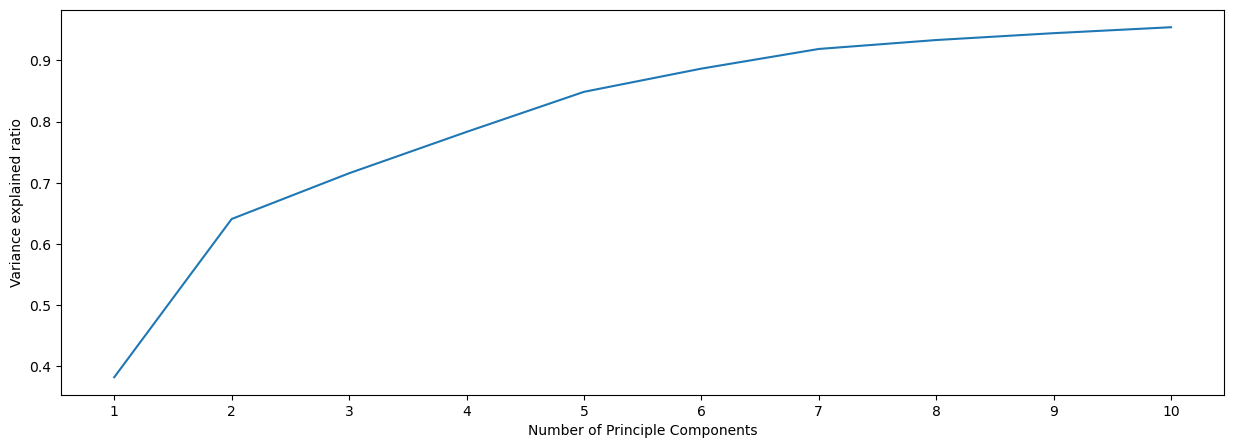

Number of components to keep: 10


In [76]:
# Print the cumulative sum of explained variance to see how many components are necessary
cumulative_variance = np.cumsum(pca_variance.explained_variance_ratio_)
print(cumulative_variance)

plt.plot(range(1, 11), cumulative_variance)
plt.xlabel("Number of Principle Components")
plt.ylabel("Variance explained ratio")
plt.xticks(range(1, 11))

plt.show()

# Determine the number of components to keep by setting a threshold
threshold = 0.95
n_components_keep = np.where(cumulative_variance >= threshold)[0][0] + 1

print(f"Number of components to keep: {n_components_keep}")

In [35]:
# # Assuming pca_variance is already fitted with X_processed
# X_reduced = pca_variance.transform(X_processed_pca)[:, :n_components_keep]

# # Create a DataFrame from the reduced dataset (optional)
# X_reduced_df = pd.DataFrame(
#     X_reduced, columns=[f"PC{i+1}" for i in range(n_components_keep)]
# )

In [36]:
# X_reduced_df

In [37]:
# for c in range(optimal_k):
#     cluster_data = df[df["Cluster"] == c]
#     print(f"Cluster {c} Statistics:")
#     display(cluster_data.describe())

In [38]:
# Retrieve original centroids if needed
num_scaler = preprocessor.named_transformers_["num"]
scaled_centroids = kmeans.cluster_centers_[
    :, : len(numerical_features)
]  # assuming numerical features come first
original_centroids = num_scaler.inverse_transform(scaled_centroids)

# Create a DataFrame of centroids in the original feature space
centroids_df = pd.DataFrame(original_centroids, columns=numerical_features)
centroids_df["Cluster"] = range(1, optimal_k + 1)
print(centroids_df)

   Lagging_Current_Reactive_Power_kVarh  Leading_Current_Reactive_Power_kVarh  \
0                             27.093321                              0.522799   
1                              4.916054                              0.059457   
2                              0.118351                             16.317557   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor  \
0                     90.761045                     99.831406   
1                     60.180794                     99.562757   
2                     99.749241                     27.707218   

   Lagging_Current_Reactive_Power_kVarh  Leading_Current_Reactive_Power_kVarh  \
0                             27.093321                              0.522799   
1                              4.916054                              0.059457   
2                              0.118351                             16.317557   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor           NSM  \
0         

# Cluster Analysis

- ### Cluster 1 (Cluster 0 in zero-indexing)

  - Lagging and Leading Current Reactive Power (kVarh): This cluster has high values of lagging reactive power and relatively low values of leading reactive power, suggesting it may represent conditions where equipment is largely inductive (common in motors, transformers, etc.).
  - Power Factors: Both lagging and leading current power factors are relatively high, with the leading power factor being almost perfect (close to 100%). This indicates very efficient power usage.
  - NSM (Normalized System Minutes): Has the highest NSM values, which could relate to specific operational timings in a day.
  - Month, Day, and Hour: Shows mid-range values for month and day, and higher values for the hour, suggesting midday or afternoon operations.

- ### Cluster 2 (Cluster 1 in zero-indexing)

  - Reactive Power: Much lower lagging and leading reactive power values compared to Cluster 1. This might indicate lesser energy consumption or different types of equipment.
  - Power Factors: The lagging power factor is significantly lower, which might suggest less efficient power usage or a different operational mode. The leading power factor remains very high.
  - NSM: Lowest among the clusters, possibly indicating operations during less active periods.
  - Month, Day, and Hour: Similar month and day values as Cluster 1 but much lower hour values, possibly indicating night-time operations.

- ### Cluster 3 (Cluster 2 in zero-indexing)

  - Reactive Power: Very low lagging and very high leading reactive power, suggesting a different kind of load, potentially more capacitive (which could be electronic devices or systems that use capacitors).
  - Power Factors: The lagging power factor is near perfect, but the leading power factor is very low, which is unusual and might indicate specific conditions or malfunctions.
  - NSM: The highest NSM, which could indicate operations during peak activity times.
  - Month, Day, and Hour: Slightly higher values for month and day, and high hour values similar to Cluster 1, possibly also indicating afternoon operations.

## Conclusion

### From the centroids, we have conclusion about pattern of our three clusters:

- ### Cluster 1 might represent a standard operational mode with efficient, mostly inductive loads during peak daytime hours.
- ### Cluster 2 seems to represent operations that occur at night with less energy consumption and efficiency.
- ### Cluster 3 might include operations involving different or unusual equipment types or settings, such as capacitive loads, during peak times.


# V. Training model


## a) Preprocessing Data


### Split the data


In [39]:
X = df.drop(["Usage_kWh", "date"], axis=1)
y = df["Usage_kWh"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Define numerical and categorical features


In [40]:
# Define numerical features that will be scaled
numerical_features = [
    "Lagging_Current_Reactive_Power_kVarh",
    "Leading_Current_Reactive_Power_kVarh",
    "Lagging_Current_Power_Factor",
    "Leading_Current_Power_Factor",
    "Lagging_Current_Reactive_Power_kVarh",
    "Leading_Current_Reactive_Power_kVarh",
    "Lagging_Current_Power_Factor",
    "Leading_Current_Power_Factor",
    "NSM",
    "month",
    "day_of_month",
    "hour",
    "CO2",
]

# Categorical features for encoding
categorical_features = [
    "Load_Type",
    "WeekStatus",
    "Day_of_week",
]

### Prepare a pipeline for training model include :

- normalize our numerical value
- one-hot encode our categorical value


In [41]:
# Define transformers for the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

We do not have to deal with missing value here as there is no null value in our data according to the previous part exploration


## b) Conduct the Machine Learning model


- ## Linear Regression


In [42]:
lr_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ("poly", PolynomialFeatures(degree=3)),
        ("model", LinearRegression()),
    ]
)

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'NSM', 'month',
                                                   'day_of_month', 'hour',
                                                   'CO2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Load_Type', 'WeekStatus',
                                                   'Day_of_week'])])),
                ('model', LinearRegression())])

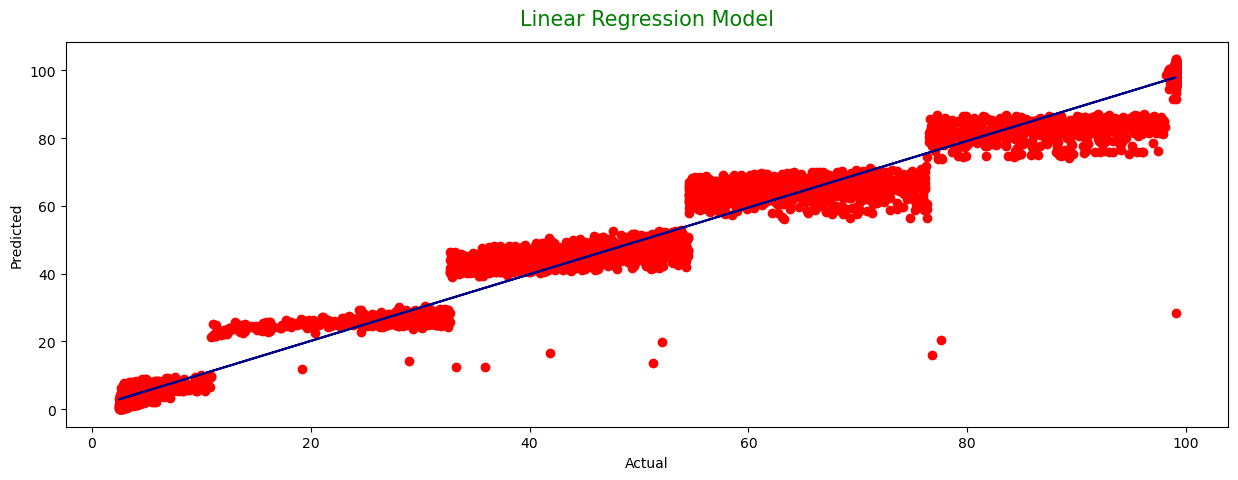

Training score: 0.9815675003539851
Test score: 0.9847411258861541
Mean Absolute Error :  2.495627199866819
Mean Squared Error :  15.325299908084956
Root Mean Squared Error :  3.9147541312431047
Mean Squared Error: 15.325299908084956
R-squared: 0.9847411258861541


In [43]:
y_pred = lr_pipe.predict(X_test)
# visualize model
x1 = y_test
y1 = y_pred

plt.title("Linear Regression Model", fontsize=15, color="g", pad=12)
plt.plot(x1, y1, "o", color="r")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m * x1 + b, color="darkblue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("Training score: {}".format(lr_pipe.score(X_train, y_train)))

print("Test score: {}".format(lr_pipe.score(X_test, y_test)))

# check MAE, MSE and MSE
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

### Test the model


In [44]:
# Select the first sample of the X_test set
X_test_first_sample = X_test.iloc[
    0:1
]  # iloc ensures the data is kept in the same format

# Use the pipeline to predict the first sample
y_pred_first_sample = lr_pipe.predict(X_test_first_sample)

# Output the prediction
print("Prediction for 1st data row is:", y_pred_first_sample[0])

Prediction for 1st data row is: 3.16015625


- ## Elastic Net


In [45]:
el_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ("poly", PolynomialFeatures(degree=3)),
        ("model", ElasticNetCV()),
    ]
)

el_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'NSM', 'month',
                                                   'day_of_month', 'hour',
                                                   'CO2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Load_Type', 'WeekStatus',
                                                   'Day_of_week'])])),
                ('model', ElasticNetCV())])

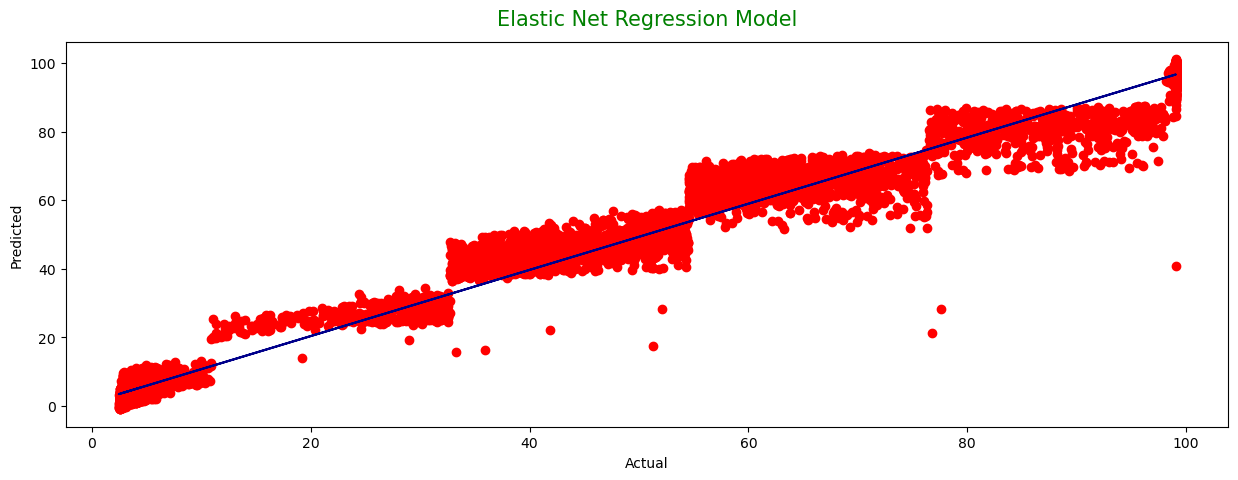

Training score: 0.9794763252057116
Test score: 0.9813608724496078
Mean Absolute Error :  2.915684089065377
Mean Squared Error :  18.72026845516811
Root Mean Squared Error :  4.326692553806904
Mean Squared Error: 18.72026845516811
R-squared: 0.9813608724496078


In [46]:
y_pred = el_pipe.predict(X_test)
# visualize model
x1 = y_test
y1 = y_pred

plt.title("Elastic Net Regression Model", fontsize=15, color="g", pad=12)
plt.plot(x1, y1, "o", color="r")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m * x1 + b, color="darkblue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("Training score: {}".format(el_pipe.score(X_train, y_train)))

print("Test score: {}".format(el_pipe.score(X_test, y_test)))

# check MAE, MSE and MSE
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

### Test the model


In [47]:
# Select the first sample of the X_test set
X_test_first_sample = X_test.iloc[
    0:1
]  # iloc ensures the data is kept in the same format

# Use the pipeline to predict the first sample
y_pred_first_sample = el_pipe.predict(X_test_first_sample)

# Output the prediction
print("Prediction for 1st data row is:", y_pred_first_sample[0])

Prediction for 1st data row is: 3.240690522455747


- ## Gradient Boosting Machine (GBM)


In [48]:
gbm_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ("poly", PolynomialFeatures(degree=3)),
        ("model", GradientBoostingRegressor()),
    ]
)

gbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'NSM', 'month',
                                                   'day_of_month', 'hour',
                                                   'CO2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Load_Type', 'WeekStatus',
                                                   'Day_of_week'])])),
                ('model', GradientBoostingRegressor())])

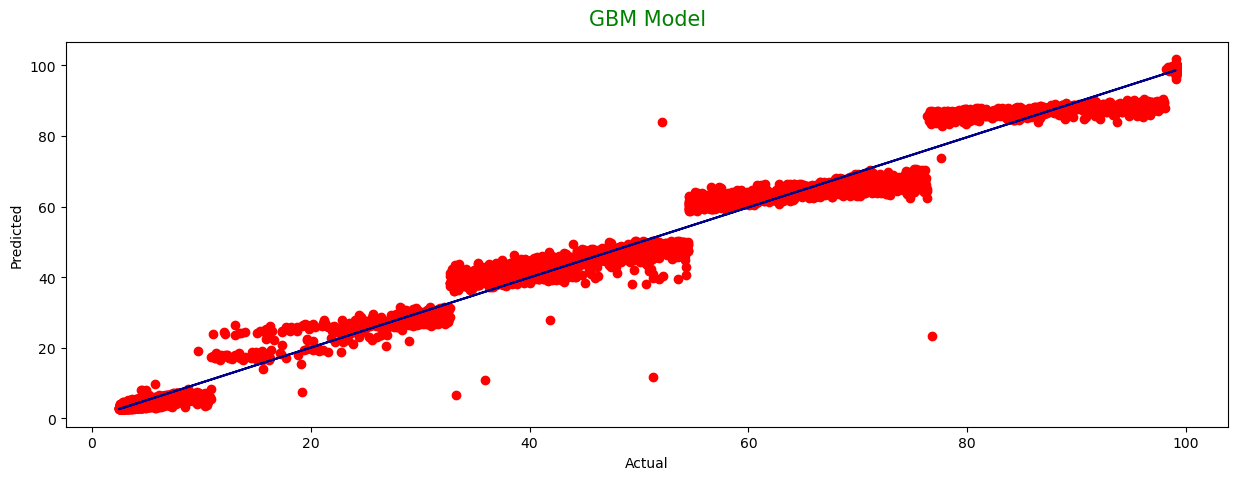

Training score: 0.9936504280306113
Test score: 0.9931388350303896
Mean Absolute Error :  1.4845282274890934
Mean Squared Error :  6.891033381205675
Root Mean Squared Error :  2.62507778574382
Mean Squared Error: 6.891033381205675
R-squared: 0.9931388350303896


In [49]:
y_pred = gbm_pipe.predict(X_test)
# visualize model
x1 = y_test
y1 = y_pred

plt.title("GBM Model", fontsize=15, color="g", pad=12)
plt.plot(x1, y1, "o", color="r")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m * x1 + b, color="darkblue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("Training score: {}".format(gbm_pipe.score(X_train, y_train)))

print("Test score: {}".format(gbm_pipe.score(X_test, y_test)))

# check MAE, MSE and MSE
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

### Test the model


In [50]:
# Select the first sample of the X_test set
X_test_first_sample = X_test.iloc[
    0:1
]  # iloc ensures the data is kept in the same format

# Use the pipeline to predict the first sample
y_pred_first_sample = gbm_pipe.predict(X_test_first_sample)

# Output the prediction
print("Prediction for 1st data row is:", y_pred_first_sample[0])

Prediction for 1st data row is: 3.1076135020275726


- ## Random Forest


In [51]:
rf_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ("poly", PolynomialFeatures(degree=3)),
        ("model", RandomForestRegressor()),
    ]
)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'NSM', 'month',
                                                   'day_of_month', 'hour',
                                                   'CO2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Load_Type', 'WeekStatus',
                                                   'Day_of_week'])])),
                ('model', RandomForestRegressor())])

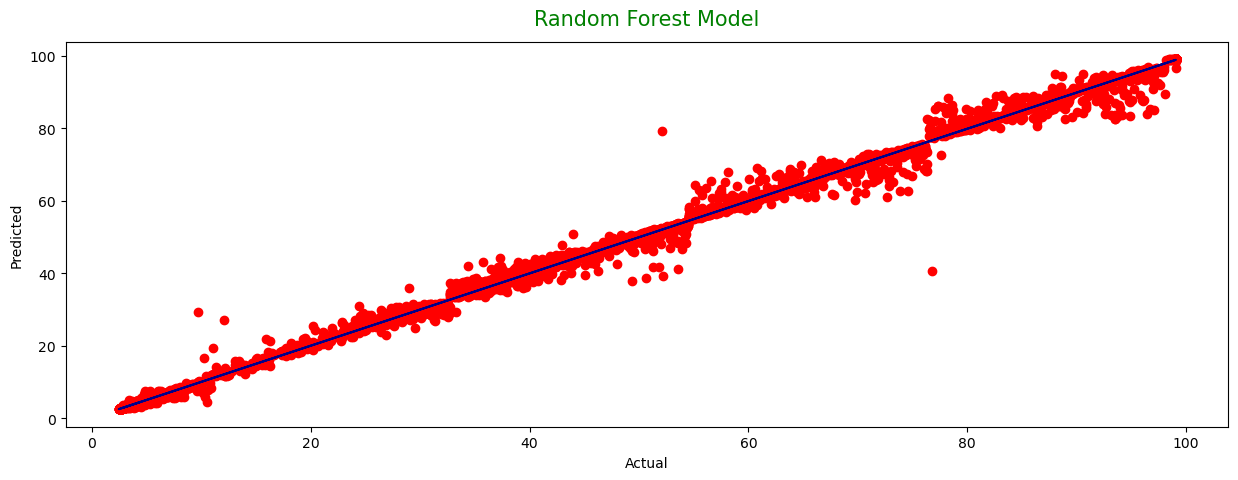

Training score: 0.9997984738223519
Test score: 0.9985664546512699
Mean Absolute Error :  0.38971042617960794
Mean Squared Error :  1.4397859394615662
Root Mean Squared Error :  1.1999108047940756
Mean Squared Error: 1.4397859394615662
R-squared: 0.9985664546512699


In [52]:
y_pred = rf_pipe.predict(X_test)
# visualize model
x1 = y_test
y1 = y_pred

plt.title("Random Forest Model", fontsize=15, color="g", pad=12)
plt.plot(x1, y1, "o", color="r")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m * x1 + b, color="darkblue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("Training score: {}".format(rf_pipe.score(X_train, y_train)))

print("Test score: {}".format(rf_pipe.score(X_test, y_test)))

# check MAE, MSE and MSE
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

### Test the model


In [53]:
# Select the first sample of the X_test set
X_test_first_sample = X_test.iloc[
    0:1
]  # iloc ensures the data is kept in the same format

# Use the pipeline to predict the first sample
y_pred_first_sample = rf_pipe.predict(X_test_first_sample)

# Output the prediction
print("Prediction for 1st data row is:", y_pred_first_sample[0])

Prediction for 1st data row is: 2.870899999999998


- ## Ada Boost


In [54]:
ada_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        # ("poly", PolynomialFeatures(degree=3)),
        ("model", AdaBoostRegressor()),
    ]
)

ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'Lagging_Current_Reactive_Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'Leading_Current_Power_Factor',
                                                   'NSM', 'month',
                                                   'day_of_month', 'hour',
                                                   'CO2']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Load_Type', 'WeekStatus',
                                                   'Day_of_week'])])),
                ('model', AdaBoostRegressor())])

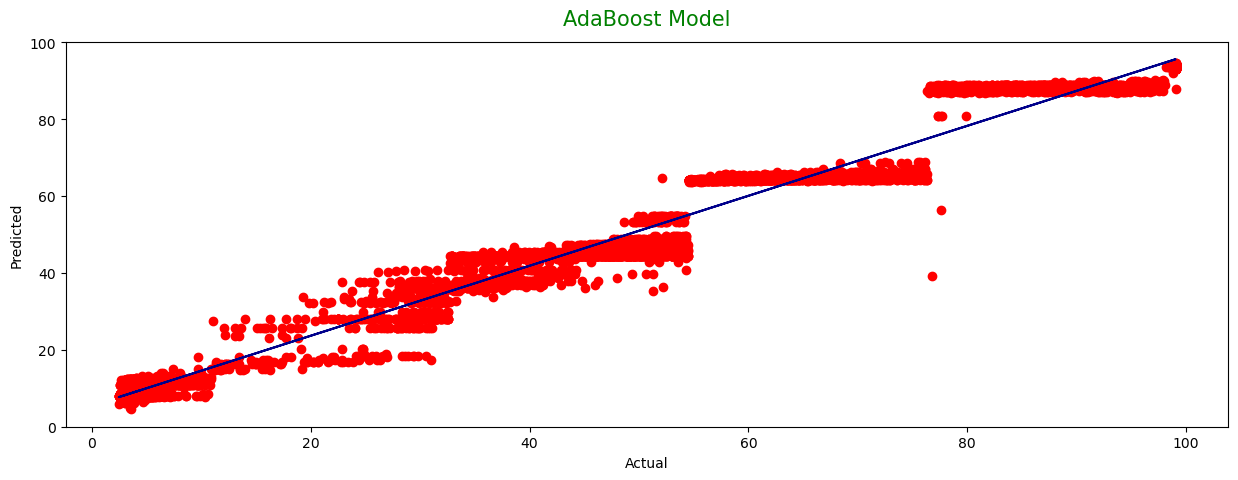

Training score: 0.9715213059464437
Test score: 0.9718802001238616
Mean Absolute Error :  4.892219429852808
Mean Squared Error :  28.242212580161077
Root Mean Squared Error :  5.314340277039199
Mean Squared Error: 28.242212580161077
R-squared: 0.9718802001238616


In [55]:
y_pred = ada_pipe.predict(X_test)
# visualize model
x1 = y_test
y1 = y_pred

plt.title("AdaBoost Model", fontsize=15, color="g", pad=12)
plt.plot(x1, y1, "o", color="r")

m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m * x1 + b, color="darkblue")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

print("Training score: {}".format(ada_pipe.score(X_train, y_train)))

print("Test score: {}".format(ada_pipe.score(X_test, y_test)))

# check MAE, MSE and MSE
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error : ", math.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

### Test the model


In [56]:
# Select the first sample of the X_test set
X_test_first_sample = X_test.iloc[
    0:1
]  # iloc ensures the data is kept in the same format

# Use the pipeline to predict the first sample
y_pred_first_sample = ada_pipe.predict(X_test_first_sample)

# Output the prediction
print("Prediction for 1st data row is:", y_pred_first_sample[0])

Prediction for 1st data row is: 8.033935882579893


## Conclusion :

- ### Overall, seems like most models came pretty close to each other.

- ### One thing to note is that GBM, Random Forest, and AdaBoost Model can be far better in parameter tuning, which will be done later.

- ### Ada Boost preform badly compared to other models, showing the sensitivity of AdaBoost to Outlier data, and it's need for tuning.


# VI. Compare Model


- ### Adding hyperparameter-tuning by combining RandomizedSearchCV and GridSearchCV


# Phase 1 - RandomizedSearchCV


- ### Start with RandomizedSearchCV: Begin the tuning process with RandomizedSearchCV, which randomly selects a subset of parameter combinations to evaluate. The key advantage here is speed, as it doesn’t exhaustively test all parameter combinations but rather a random sample within the specified parameter grid.


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNetCV(cv=5, random_state=42),
    "GBM": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
}

# Define parameter distributions for RandomizedSearchCV for models that need it
param_distributions = {
    "GBM": {
        "regressor__n_estimators": randint(100, 300),
        "regressor__max_depth": randint(3, 7),
        "regressor__learning_rate": uniform(0.05, 0.15),
    },
    "Random Forest": {
        "regressor__n_estimators": randint(100, 500),
        "regressor__max_features": ["sqrt", "log2"],
        "regressor__max_depth": randint(3, 20),
    },
    "AdaBoost": {
        "regressor__n_estimators": randint(30, 200),
        "regressor__learning_rate": uniform(0.01, 1.0),
    },
}

params = {}
# Phase 1: Randomized Search to narrow down the parameters
for name, model in models.items():
    pipeline = Pipeline([("preprocessor", preprocessor), ("regressor", model)])
    if name in param_distributions:
        random_search = RandomizedSearchCV(
            pipeline,
            param_distributions[name],
            n_iter=10,
            cv=3,
            random_state=42,
            scoring="neg_mean_squared_error",
            n_jobs=-1,
            error_score="raise",
        )
        random_search.fit(X_train, y_train)
        models[name] = random_search.best_estimator_
        params[name] = random_search
    else:
        pipeline.fit(X_train, y_train)
        models[name] = pipeline
    print(name)

Linear Regression
Elastic Net
GBM
Random Forest
AdaBoost


### The best params we attained after RandomizedSearchCV


In [63]:
for name, model in models.items():
    if name in param_distributions:
        print(params[name].best_params_)

{'regressor__learning_rate': 0.08185086660174143, 'regressor__max_depth': 6, 'regressor__n_estimators': 287}
{'regressor__max_depth': 17, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 171}
{'regressor__learning_rate': 0.22233911067827616, 'regressor__n_estimators': 50}


# Phase 2 - GridSearchCV


- ### Using the insights gained from the RandomizedSearchCV, set up a more focused and narrower hyperparameter grid in GridSearchCV.
- ### This time, the grid should include only the most promising values and combinations identified earlier. GridSearchCV performs an exhaustive search over the specified parameter grid, ensuring that you explore all combinations within the refined space.
- ### This step is more computationally expensive but is justified by the higher precision in tuning.


In [64]:
# Define parameter grids for GridSearchCV based on RandomizedSearchCV's results
param_grids = {
    "GBM": {
        "regressor__n_estimators": [
            int(x)
            for x in np.linspace(
                params["GBM"].best_params_["regressor__n_estimators"] - 25,
                params["GBM"].best_params_["regressor__n_estimators"] + 25,
                5,
            )
        ],
        "regressor__max_depth": [
            int(x)
            for x in np.linspace(
                params["GBM"].best_params_["regressor__max_depth"] - 2,
                params["GBM"].best_params_["regressor__max_depth"] + 2,
                3,
            )
        ],
        "regressor__learning_rate": np.linspace(
            params["GBM"].best_params_["regressor__learning_rate"] * 0.8,
            params["GBM"].best_params_["regressor__learning_rate"] * 1.2,
            5,
        ),
    },
    "Random Forest": {
        "regressor__n_estimators": [
            int(x)
            for x in np.linspace(
                params["Random Forest"].best_params_["regressor__n_estimators"] - 50,
                params["Random Forest"].best_params_["regressor__n_estimators"] + 50,
                5,
            )
        ],
        "regressor__max_features": [
            params["Random Forest"].best_params_["regressor__max_features"]
        ],
        "regressor__max_depth": [
            int(x)
            for x in np.linspace(
                params["Random Forest"].best_params_["regressor__max_depth"] - 2,
                params["Random Forest"].best_params_["regressor__max_depth"] + 2,
                3,
            )
        ],
    },
    "AdaBoost": {
        "regressor__n_estimators": [
            int(x)
            for x in np.linspace(
                params["AdaBoost"].best_params_["regressor__n_estimators"] - 20,
                params["AdaBoost"].best_params_["regressor__n_estimators"] + 20,
                3,
            )
        ],
        "regressor__learning_rate": np.linspace(
            params["AdaBoost"].best_params_["regressor__learning_rate"] * 0.8,
            params["AdaBoost"].best_params_["regressor__learning_rate"] * 1.2,
            3,
        ),
    },
}

grid_params = {}
# Phase 2: Grid Search for fine-tuning
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(
            model,
            param_grids[name],
            cv=3,
            scoring="neg_mean_squared_error",
            n_jobs=-1,
            error_score="raise",
        )
        grid_search.fit(X_train, y_train)
        models[name] = grid_search.best_estimator_
        grid_params[name] = grid_search.best_params_
        print(name)

GBM
Random Forest
AdaBoost


## Our optimal/near-optimal parameter settings after refinement


In [65]:
grid_params

{'GBM': {'regressor__learning_rate': 0.0982210399220897,
  'regressor__max_depth': 6,
  'regressor__n_estimators': 312},
 'Random Forest': {'regressor__max_depth': 19,
  'regressor__max_features': 'sqrt',
  'regressor__n_estimators': 171},
 'AdaBoost': {'regressor__learning_rate': 0.26680693281393136,
  'regressor__n_estimators': 50}}

### Adding VotingRegressor for better evaluation


In [66]:
ensemble_model = VotingRegressor(
    estimators=[(name, model) for name, model in models.items()]
)
models["VotingRegressor"] = ensemble_model

In [67]:
ensemble_model

VotingRegressor(estimators=[('Linear Regression',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Lagging_Current_Reactive_Power_kVarh',
                                                                                'Leading_Current_Reactive_Power_kVarh',
                                                                                'Lagging_Current_Power_Factor',
                                                                                'Leading_Current_Power_Factor',
                                                                                'Lagging_Current_Reactive_Power_kVarh',
                                                                                'Leading_Current_Reactive_Power_kV...
                                                                                'Leading_Current_Power_Factor',
                                                                                'Lagging_Current_Reactive_Power_kVarh',
                                                                                'Leading_Current_Reactive_Power_kVarh',
                                                                                'Lagging_Current_Power_Factor',
                                                                                'Leading_Current_Power_Factor',
                                                                                'NSM',
                                                                                'month',
                                                                                'day_of_month',
                                                                                'hour',
                                                                                'CO2']),
                                                                              ('cat',
                                                                               OneHotEncoder(),
                                                                               ['Load_Type',
                                                                                'WeekStatus',
                                                                                'Day_of_week'])])),
                                             ('regressor',
                                              AdaBoostRegressor(learning_rate=0.26680693281393136,
                                                                random_state=42))]))])

### Evaluate our models using mean squared error


In [68]:
# Fit and evaluate all models including the ensemble
for name, model in models.items():
    model.fit(X_train, y_train)
    model.fit(X_train, y_train)  # Ensure all models are fitted
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse}")

Linear Regression Test MSE: 15.267799623822075
Elastic Net Test MSE: 18.659213662959093
GBM Test MSE: 1.2547326041688525
Random Forest Test MSE: 1.8729670281195308
AdaBoost Test MSE: 12.687662177366153
VotingRegressor Test MSE: 5.972017032191715


- ### The outcome shows that the tree-based methods, particularly **GBM** and **Random Forest**, outperform the other models.
- ### **GBM (Gradient Boosting Machine)** has the lowest MSE at approximately 1.25, indicating it has the best performance among the models listed.


## Further evaluation


- ### Apply cross validation score to assess the generalizability and stability of our machine learning model


In [77]:
beat_model_name = ""
best_mse = float("inf")
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    mse_scores = -scores
    print(f"{name} Cross-Validation MSE: {mse_scores.mean()} +/- {mse_scores.std()}")
    best_model_name = name if mse_scores.mean() < best_mse else best_model_name
    best_mse = min(mse_scores.mean(), best_mse)

Linear Regression Cross-Validation MSE: 18.327297483213417 +/- 11.42364430851683
Elastic Net Cross-Validation MSE: 20.959552115449515 +/- 10.543928972719682
GBM Cross-Validation MSE: 5.1259434649095805 +/- 7.563065583611923
Random Forest Cross-Validation MSE: 4.925000548252623 +/- 4.473242465995883
AdaBoost Cross-Validation MSE: 19.568659361551955 +/- 15.009148562998163
VotingRegressor Cross-Validation MSE: 9.911369134342207 +/- 8.585749606876044


- ### With cross-validation MSE of about 4.93 and a standard deviation of 4.47, **Random Forest** not only provides a low error rate but also exhibits relatively stable performance across different folds.
- ### Its lower standard deviation compared to other models suggests consistent performance, making it a reliable choice.
  ### --> It turns out that **Random Forest** is the best model when considering its ability to generalize well to unseen data.


# VII. DEPLOYMENT


### Using **'joblib'** library to serialize the model into a file named **Random_Forest_model.joblib**, which we can load later for predictions or further analysis:


In [72]:
# Save the best model
# best_model_name = min(
#     models, key=lambda name: mean_squared_error(y_test, models[name].predict(X_test))
# )
dump(models[best_model_name], f"{best_model_name}_model.joblib")

['Random Forest_model.joblib']

In [73]:
# Load the model
model_deploy = load("GBM_model.joblib")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Make predictions
y_pred = model_deploy.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9235743791510306


In [74]:
# Perform cross-validation
cv_scores = cross_val_score(model_deploy, X, y, cv=3, scoring="neg_mean_squared_error")
mean_mse = -cv_scores.mean()  # Take the negative to get the MSE

print(f"Cross-Validation Mean Squared Error: {mean_mse}")

Cross-Validation Mean Squared Error: 5.554748381960909
